<a href="https://colab.research.google.com/github/pd05849/Machine_Learning_Engineering/blob/main/HMW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QUESTION 1

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file
file_path = '/content/drive/My Drive/HMW3/aircraft_performance.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


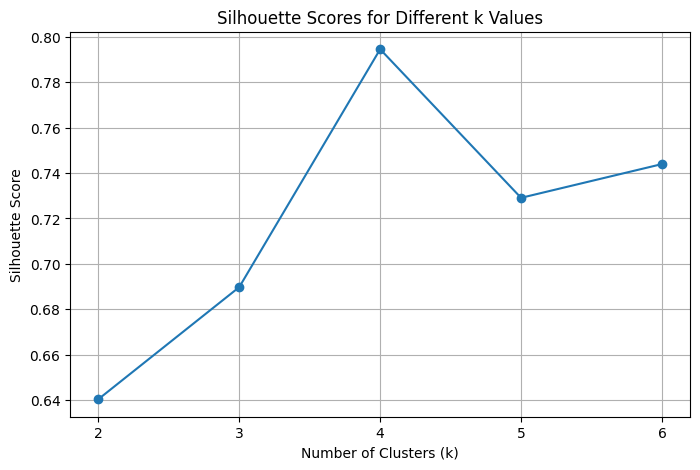

In [81]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/HMW3/aircraft_performance.csv'
df = pd.read_csv(file_path)
features = df[['Speed_kmh', 'FuelFlow_kgph']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = []

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 7))
plt.grid(True)
plt.show()

,Aircraft,Speed_kmh,FuelFlow_kgph,cluster_label
0,Cessna_172,226,24,2
1,Cessna_182,260,30,2
2,Piper_PA28,215,22,2
3,Diamond_DA40,240,26,2
4,Cirrus_SR20,250,29,2


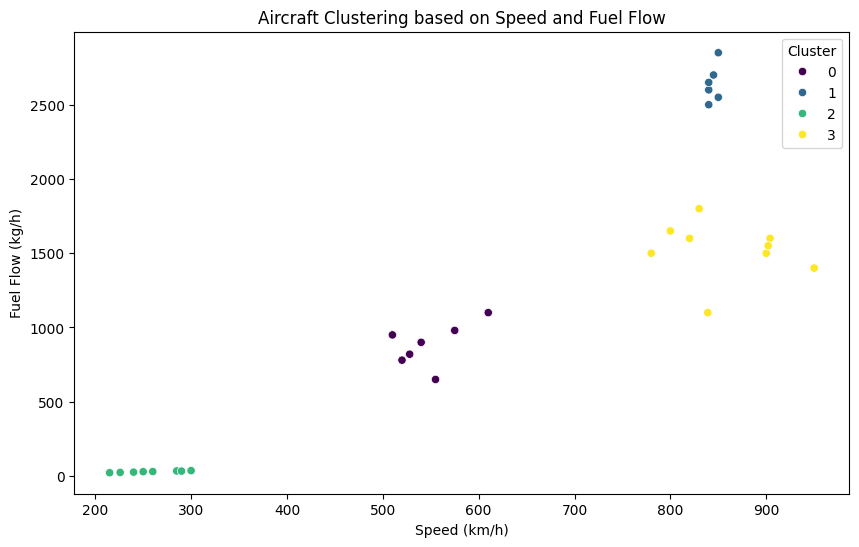

In [82]:
optimal_k = 4
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster_label'] = kmeans_optimal.fit_predict(scaled_features)
display(df.head())
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Speed_kmh', y='FuelFlow_kgph', hue='cluster_label', palette='viridis')
plt.title('Aircraft Clustering based on Speed and Fuel Flow')
plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel Flow (kg/h)')
plt.legend(title='Cluster')
plt.show()

##QUESTION 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/HMW3/housing_prices.txt'
with open(file_path, 'r') as file:
    content = file.read()

print(content)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

file_path = '/content/drive/My Drive/HMW3/housing_prices.txt'
df_housing = pd.read_csv(file_path, sep=None, engine='python')

X = df_housing.iloc[:, :-1].values
y = df_housing.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_processed = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

print("Processed Features:")
print(X_processed[:5])
print("\nTarget Variable (y):")
print(y[:5])

In [ ]:
def linear_regression_model(X, weights):

  return X @ weights

def mean_squared_error(y_true, y_pred):

  return np.mean((y_true - y_pred)**2)

print("Linear regression model and MSE objective function defined.")

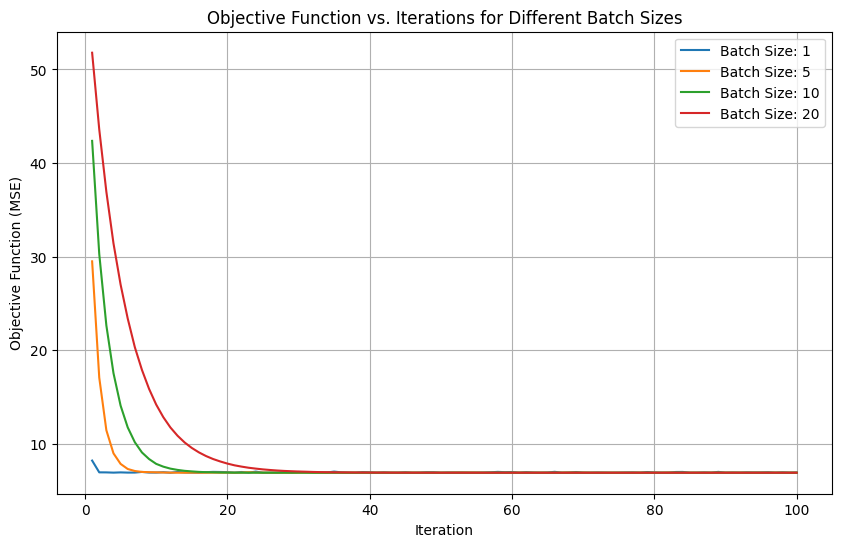

In [13]:

def mini_batch_gradient_descent(X, y, weights, learning_rate, num_iterations, batch_size):

    m = len(y)
    objective_function_values = []

    for i in range(num_iterations):
        # Shuffle the data
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        num_mini_batches = m // batch_size
        if m % batch_size != 0:
            num_mini_batches += 1

        for j in range(num_mini_batches):

            start_index = j * batch_size
            end_index = min(start_index + batch_size, m)
            X_batch = X_shuffled[start_index:end_index]
            y_batch = y_shuffled[start_index:end_index]

            y_pred_batch = linear_regression_model(X_batch, weights)

            gradient = (2/len(y_batch)) * X_batch.T @ (y_pred_batch - y_batch)

            weights = weights - learning_rate * gradient

        y_pred_full = linear_regression_model(X, weights)
        mse_full = mean_squared_error(y, y_pred_full)
        objective_function_values.append(mse_full)

    return weights, objective_function_values

    objective_function_values_dict = {}
    batch_sizes = [1, 5, 10, 20]
    learning_rate = 0.01
    num_iterations = 100

    for batch_size in batch_sizes:

        initial_weights = np.zeros(X_processed.shape[1])
        trained_weights, objective_values = mini_batch_gradient_descent(
        X_processed, y, initial_weights, learning_rate, num_iterations, batch_size
    )
        objective_function_values_dict[batch_size] = objective_values

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for batch_size, objective_values in objective_function_values_dict.items():
    plt.plot(range(1, num_iterations + 1), objective_values, label=f'Batch Size: {batch_size}')

plt.title("Objective Function vs. Iterations for Different Batch Sizes")
plt.xlabel("Iteration")
plt.ylabel("Objective Function (MSE)")
plt.legend()
plt.grid(True)
plt.show()

##QUESTION 3

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.3, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

logreg = LogisticRegression(random_state=42, solver='liblinear')
rfe = RFE(estimator=logreg, n_features_to_select=2)
rfe.fit(X_train, y_train)

print("Feature rankings:")
print(rfe.ranking_)

best_feature_indices = np.where(rfe.ranking_ == 1)[0]

print("\nNames of the two best features:")
print(breast_cancer.feature_names[best_feature_indices])

X_train_selected = X_train[:, best_feature_indices]
X_test_selected = X_test[:, best_feature_indices]

logreg_selected = LogisticRegression(random_state=42, solver='liblinear')

logreg_selected.fit(X_train_selected, y_train)

y_pred_selected = logreg_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred_selected)
precision = precision_score(y_test, y_pred_selected)
recall = recall_score(y_test, y_pred_selected)
f1 = f1_score(y_test, y_pred_selected)

print(f"Model Performance with the two best features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Shape of X_train: (398, 30)
Shape of X_test: (171, 30)
Shape of y_train: (398,)
Shape of y_test: (171,)
Feature rankings:
[ 3 13 14 28 20 17  1  5 15 18  7 11  6 10 27 23 22 24 25 29  2 12  8 26
 21  9  1  4 16 19]

Names of the two best features:
['mean concavity' 'worst concavity']
Model Performance with the two best features:
Accuracy: 0.8596
Precision: 0.8500
Recall: 0.9444
F1-score: 0.8947


QUESTION 4

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/HMW3/housing_prices.txt'

print("Loading the dataset...")
df = pd.read_csv(file_path, sep=None, engine='python')
print("Dataset loaded successfully.")
print("Displaying the first few rows of the dataset:")
display(df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data loaded, split, and features standardized.")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_val_scaled:", X_val_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

model = Sequential([
    Dense(2, activation=ReLU(), input_shape=(X_train_scaled.shape[1],)),
    Dense(1)
])

print("Neural network model constructed successfully.")
model.summary()

In [72]:
from tensorflow.keras.optimizers import SGD

model.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['mse', 'mae'])

print("Neural network model compiled successfully with SGD optimizer and MSE loss.")

Neural network model compiled successfully with SGD optimizer and MSE loss.


In [75]:
learning_rate = 0.01
num_epochs = 75

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=num_epochs,
    validation_data=(X_val_scaled, y_val),
    verbose=0
)

print("Neural network training completed.")

Neural network training completed.


In [ ]:
city_population_165k = np.array([[16.5]])

city_population_165k_scaled = scaler.transform(city_population_165k)

predicted_price_165k = model.predict(city_population_165k_scaled)
y_pred_val = model.predict(X_val_scaled)

mse_val = mean_squared_error(y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)

print(f"Predicted price for a city with population 165,000: ${predicted_price_165k[0][0]:.2f}")
print(f"Mean Squared Error (MSE) on the validation set: {mse_val:.4f}")
print(f"Root Mean Squared Error (RMSE) on the validation set: {rmse_val:.4f}")

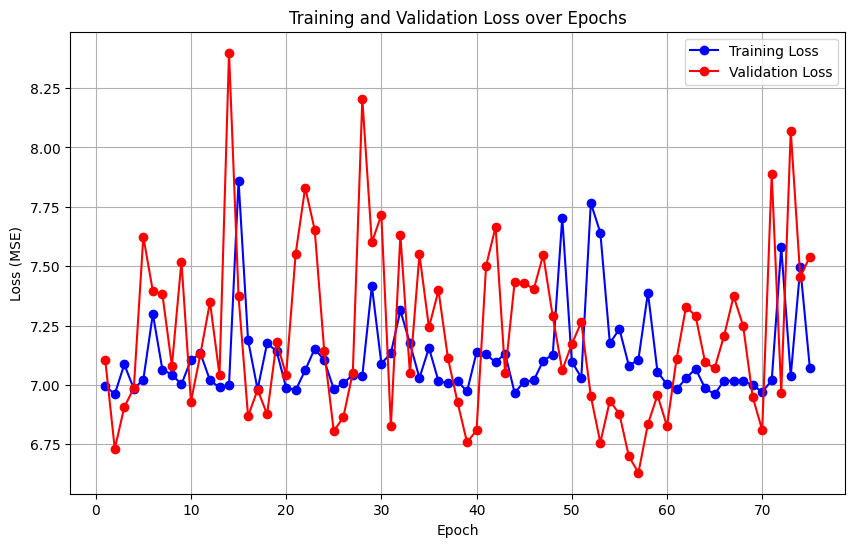

In [77]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()